<a href="https://colab.research.google.com/github/MohammedRamsheed/classification/blob/main/Project_1_heart_disease_prediction_using_knn_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***IMPORTING NECESSARY LIBRARIES AND DATASET***


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/drive/MyDrive/datasets/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# *checking for any missing values*

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.dtypes #-------> looking for the datatypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

**splitting the data set into X (input data),y(target data)**

---



In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(X)
print(y) #-----> the 1 signifies the chance of diabetes and '0' for no diabetes

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

# **DATA PREPROCESSING STEPS**

1. scaling the 'X' dataset to match the 'y' parameter

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
X_scaled #----->this will be taken as the X dataset

array([[0.47916667, 1.        , 0.        , ..., 1.        , 0.5       ,
        1.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.85416667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.375     , 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.4375    , 0.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.52083333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ]])

2. Splitting X-scaled data and y dataset into training and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)
print(X_train.shape) #----->the training data of input variables
print(X_test.shape)  #----->test data for input variables
print(y_train.shape) #----->the training data for outcome(prediction)
print(y_test.shape)  #----->the test data for outco

(717, 13)
(308, 13)
(717,)
(308,)


# **importing KNN CLASSIFIER FOR KNN ALGORITHM**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train) #------>training the model with the training data


KNeighborsClassifier()

prediction

In [ ]:
y_pred=knn.predict(X_test)


finding out the accuracy_score,precision and recall of our new model

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       161
           1       0.84      0.91      0.87       147

    accuracy                           0.87       308
   macro avg       0.87      0.88      0.87       308
weighted avg       0.88      0.87      0.87       308

the accuracy of this model is  87.33766233766234


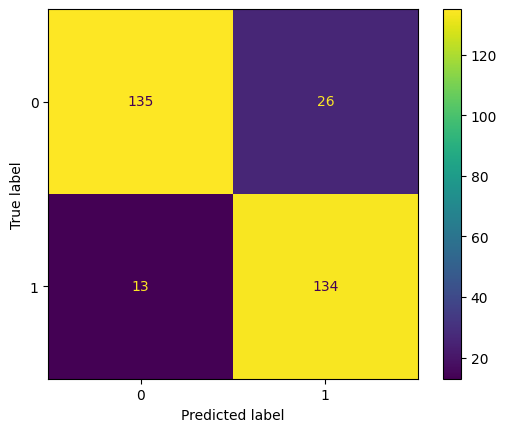

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
accuracy1=accuracy_score(y_test,y_pred)*100
print("the accuracy of this model is ",accuracy_score(y_test,y_pred)*100)

*as we can see the accuracy is 87.337% ,we can use hyperparameter tuning for maximum accuracy*

**HYPER PARAMETER TUNING**

In [ ]:
from sklearn.model_selection import GridSearchCV
knn1=KNeighborsClassifier()
params={'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23,25,27,29],
        'weights':['uniform','distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
clf=GridSearchCV(knn1,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)#---> this print out the best parameter options for optimised accuracy

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


# ***recreating the KNN MODEL using optimised parameters***

In [ ]:
knn_new=KNeighborsClassifier(algorithm='auto',n_neighbors=23,weights='distance')
knn_new.fit(X_train,y_train)
y_pred_knn_new=knn_new.predict(X_test)


the optmised accuracy score is 98.7012987012987
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       161
           1       0.97      1.00      0.99       147

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



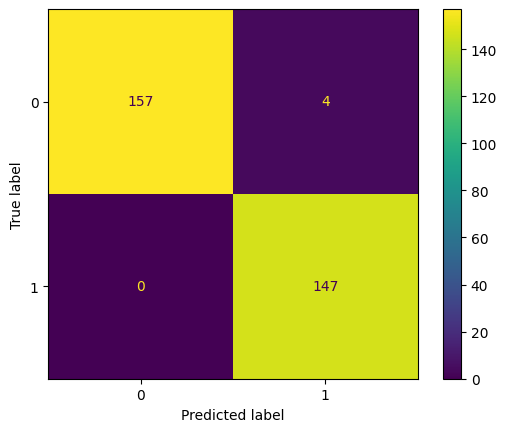

In [ ]:
accuracy2=accuracy_score(y_test,y_pred_knn_new)*100
print("the optmised accuracy score is",accuracy2)
print(classification_report(y_test,y_pred_knn_new))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn_new))

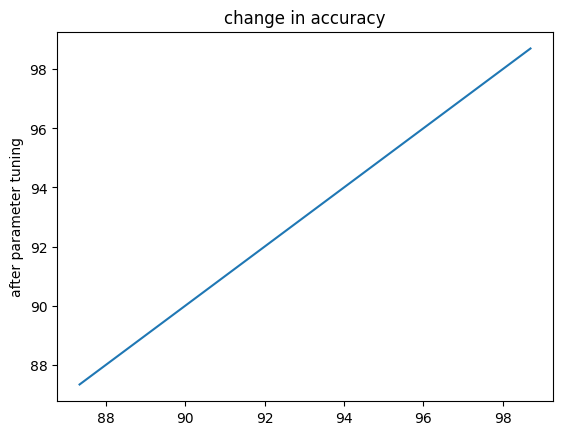

11.36363636363636


In [ ]:
#difference in accuracy
a=[accuracy1,accuracy2]
b=[accuracy1,accuracy2]
plt.plot(a,b)
plt.ylabel('after parameter tuning')
plt.title('change in accuracy')
plt.show()
print(accuracy2-accuracy1)

In [ ]:
df['cp'].unique()

array([0, 1, 2, 3])

**PREDICTING WHETHER THE PATIENT HAVE DIABETES OR NOT**

In [ ]:
a=int(input("enter the age"))
b=int(input("enter the sex- 0 for female, 1 for male:"))
c=int(input("enter Cp (chest pain),(Value 0: typical angina ,\nValue 1: atypical angina, Value 2: non-anginal pain , Value 3: asymptomatic)"))
d=int(input("enter the resting blood pressure"))
e=int(input("enter the cholestrol mg/dl"))
f=float(input("enter fasting blood sugar : 0< 120mg/ml , 1> 120 mg/ml"))
g=float(input("enter the resting electrocardiographic measurement :"))
h=int(input("enter the maximum heart rate achieved"))
i=int(input('Exercise induced angina (1 = yes; 0 = no)'))
j=float(input('oldpeak value'))
k=int(input('slope = Value 1: upsloping, Value 2: flat, Value 3: downsloping'))1l=int(input('The number of major vessels(0-3)'))
m=int(input('thalassemia'))

y_new=knn_new.predict(scaler.transform([[a,b,c,d,e,f,g,h,i,j,k,l,m]]))
if y_new==1:
  print("THE PATIENT HAS DIABETES") #52	1	0	125	212	0	1	168	0	1.0	2	2	3
  #59	1	1	140	221	0	1	164	1	0.0	2	0	2	1
else:
  print("THE PATIENT DOES NOT HAVE DIABETES")

enter the age59
enter the sex- 0 for female, 1 for male:1
enter Cp (chest pain),(Value 0: typical angina ,
Value 1: atypical angina, Value 2: non-anginal pain , Value 3: asymptomatic)1
enter the resting blood pressure140
enter the cholestrol mg/dl221
enter fasting blood sugar : 0< 120mg/ml , 1> 120 mg/ml0
enter the resting electrocardiographic measurement :1
enter the maximum heart rate achieved164
Exercise induced angina (1 = yes; 0 = no)1
oldpeak value0
slope = Value 1: upsloping, Value 2: flat, Value 3: downsloping2
The number of major vessels(0-3)0
thalassemia2
THE PATIENT HAS DIABETES
